In [ ]:
# !pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from pycaret.regression import  *
sns.set()

In [ ]:
# !pip install mlflow

In [ ]:
# !pip install pycaret-ts-alpha

In [ ]:
data = pd.read_csv('Swarm_Behaviour.csv')
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28.0,0.0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4.0,0.0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15.0,1.0,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16.0,0.0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12.0,0.0,0.0


In [ ]:
data = data.reset_index()
data = data.rename(columns={"index": "id"})

data.head()

,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28.0,0.0,0.0
1,1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4.0,0.0,0.0
2,2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15.0,1.0,0.0
3,3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16.0,0.0,0.0
4,4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12.0,0.0,0.0


In [ ]:
target = data[["id","Swarm_Behaviour"]]

data = data.drop(columns = "Swarm_Behaviour")

In [ ]:
data_columns = ["time", "id", 'x', 'y', 'xVel', 'yVel', 'xA', 'yA', 'xS', 'yS', 'xC', 'yC', 'nAC', 'nS']

In [ ]:
data_rows = pd.DataFrame(columns = data_columns)

data_rows.head()

,time,id,x,y,xVel,yVel,xA,yA,xS,yS,xC,yC,nAC,nS


In [ ]:
x = ["x" + str(i) for i in range(1,51)]

In [ ]:
data[["id"] + x].head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,0,562.05,-625.98,199.07,611.35,-852.51,-570.91,249.82,65.63,658.58,...,217.78,-775.09,87.83,-1286.04,-1223.47,161.26,-773.42,1036.53,-315.77,-1127.15
1,1,175.66,-453.53,349.38,1333.24,1009.51,-77.91,-1202.57,-701.18,-652.57,...,1212.58,757.69,-750.62,1345.38,551.88,1290.29,-389.30,-686.57,159.98,165.49
2,2,200.16,-1198.60,-1385.76,-75.28,130.24,795.79,-798.80,287.13,1196.31,...,-1207.74,552.75,-1195.88,677.70,-1148.33,633.48,829.66,33.77,41.43,-533.11
3,3,316.99,-425.55,-676.01,-659.70,384.53,1156.50,847.63,386.85,-271.46,...,-1122.83,-1107.28,214.62,-1238.68,-619.31,-989.44,606.00,-1231.64,718.40,1179.36
4,4,1277.68,-922.07,137.74,-736.26,-728.47,1246.23,831.95,646.84,1324.30,...,-1108.69,-873.03,940.88,98.13,134.67,-1060.95,-1028.26,-238.93,-566.36,-846.21


In [ ]:
temporal = data[["id"] + x].melt(id_vars=["id"],
            var_name = "time",
            value_vars = x,
            value_name = "x")

temporal.head()

,id,time,x
0,0,x1,562.05
1,1,x1,175.66
2,2,x1,200.16
3,3,x1,316.99
4,4,x1,1277.68


In [ ]:
temporal["time"] = [i[1:] for i in temporal["time"]]

temporal.head()

,id,time,x
0,0,1,562.05
1,1,1,175.66
2,2,1,200.16
3,3,1,316.99
4,4,1,1277.68


In [ ]:
temporal.tail()

,id,time,x
4445,84,50,-254.93
4446,85,50,1094.44
4447,86,50,-1296.09
4448,87,50,488.40
4449,88,50,592.66


In [ ]:
data_rows = data_rows.append(temporal)

data_rows.head()

<ipython-input-15-fc8c5546326e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_rows = data_rows.append(temporal)


,time,id,x,y,xVel,yVel,xA,yA,xS,yS,xC,yC,nAC,nS
0,1,0,562.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,175.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,200.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,316.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4,1277.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for column in data_columns[3:]:

    column_string = [column + str(i) for i in range(1,51)]

    temporal = data[["id"] + column_string].melt(id_vars=["id"],
                var_name = "time",
                value_vars= column_string,
                value_name = column)

    temporal = temporal.drop(columns=["time","id"])

    data_rows[column] = temporal

data_rows


,time,id,x,y,xVel,yVel,xA,yA,xS,yS,xC,yC,nAC,nS
0,1,0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.00,0.00,0.00,0.00,46,0
1,1,1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.00,0.00,0.00,0.00,7,0
2,1,2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.00,0.00,0.18,-0.26,9,0
3,1,3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.00,0.00,0.00,0.00,8,0
4,1,4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.00,0.00,0.00,0.00,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,50,84,-254.93,-169.29,-2.85,-5.16,-0.08,-0.30,-1.16,-1.58,0.17,0.22,115,0
4446,50,85,1094.44,-983.47,-1.33,8.66,-0.15,1.03,0.00,0.00,0.00,0.00,4,0
4447,50,86,-1296.09,408.32,-1.92,10.50,-0.67,0.80,0.00,0.00,0.00,0.00,2,0
4448,50,87,488.40,-34.19,-1.51,9.13,-0.17,1.03,0.00,0.00,0.00,0.00,16,0


In [ ]:
data_rows.isnull().sum()

time    0
id      0
x       0
y       0
xVel    0
yVel    0
xA      0
yA      0
xS      0
yS      0
xC      0
yC      0
nAC     0
nS      0
dtype: int64

In [ ]:
a = data_rows.dropna()

In [ ]:
a.isnull().sum()

time    0
id      0
x       0
y       0
xVel    0
yVel    0
xA      0
yA      0
xS      0
yS      0
xC      0
yC      0
nAC     0
nS      0
dtype: int64

<ipython-input-20-515e6a1c4c67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr(), annot = True, cmap="YlGnBu")


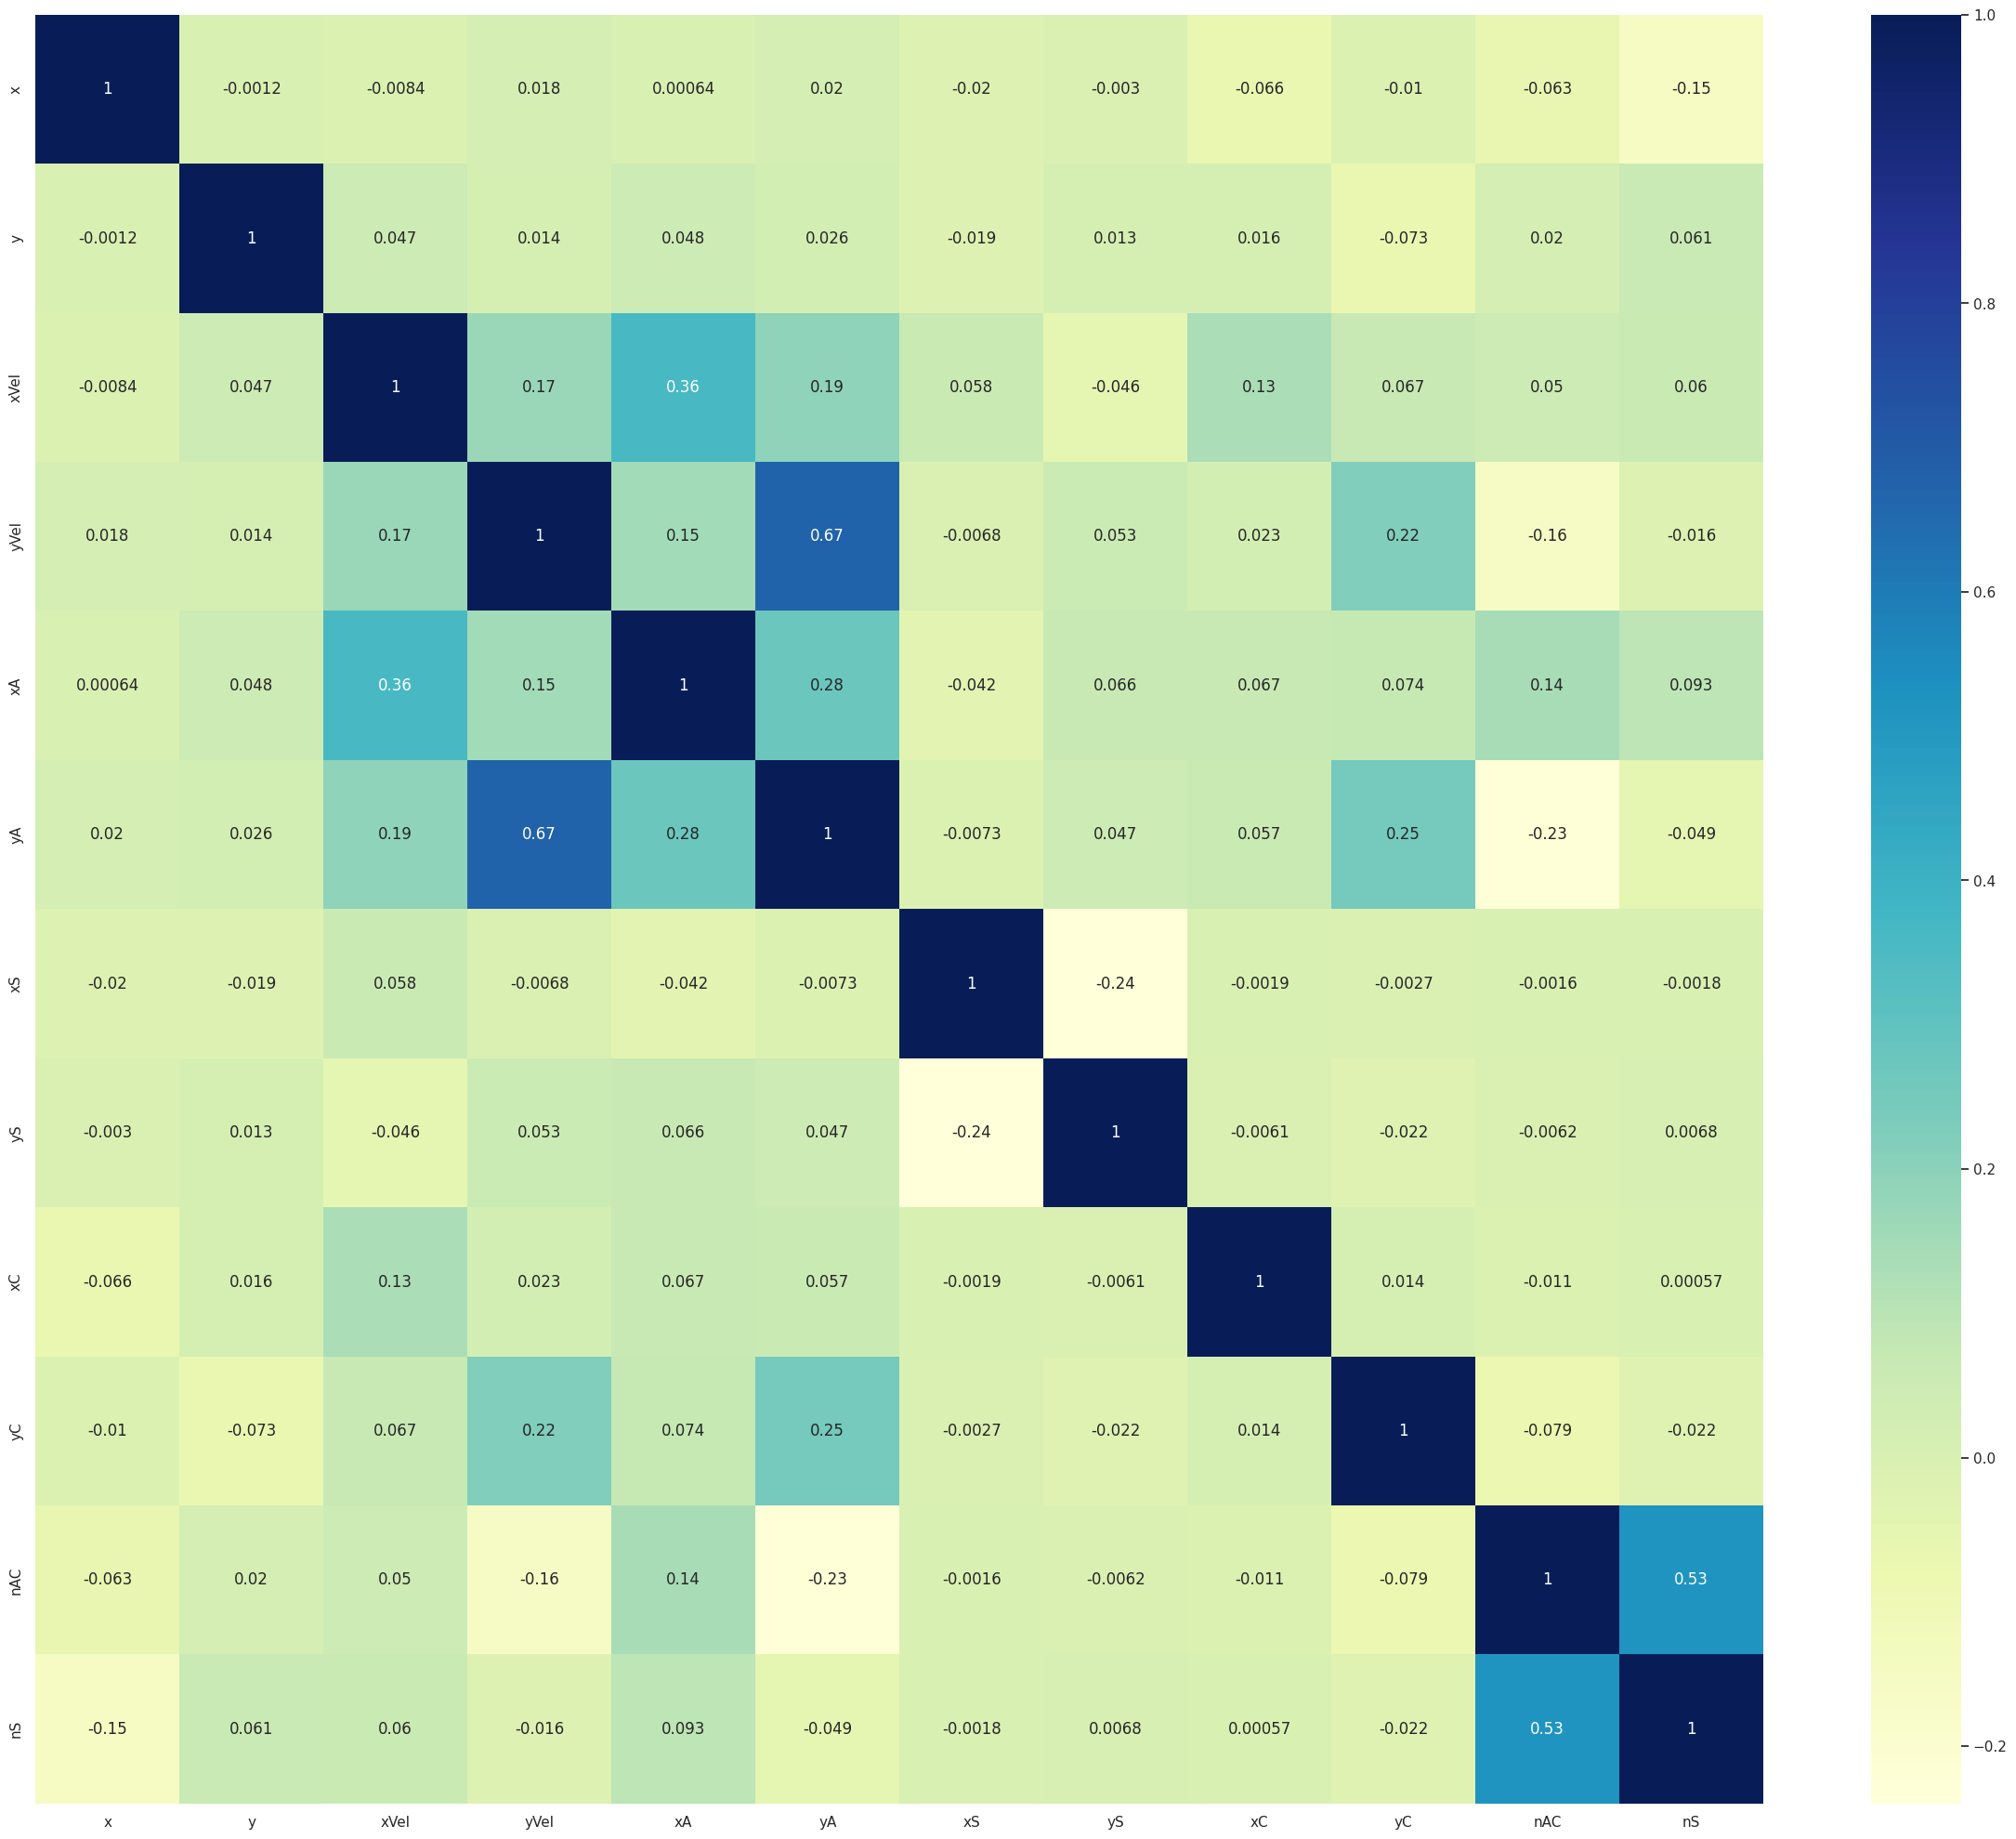

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(a.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = a.drop('nS', axis=1)
x.head()

,time,id,x,y,xVel,yVel,xA,yA,xS,yS,xC,yC,nAC
0,1,0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,46
1,1,1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,7
2,1,2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,9
3,1,3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,8
4,1,4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,5


In [ ]:
y = a['nS']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: nS, dtype: int64

In [ ]:
m_train, m_test = train_test_split(a , test_size = 0.3, random_state = 0)

In [ ]:
n_train, n_test, o_train, o_test = train_test_split(x , y, test_size = 0.3, random_state = 0)

In [ ]:
# s = setup (a, target = 'nS', fold = 8)

In [ ]:
# best_model = compare_models()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(n_train, o_train)

In [ ]:
reg.score(n_test, o_test)

0.8730830476337991

In [ ]:
est = [estimator for estimator in reg.estimators_]

In [ ]:
l = est[3].tree_.compute_feature_importances(normalize=False)

In [ ]:
l

array([ 0.31142037,  1.75285772,  9.27300273,  1.47051341,  0.47887777,
        0.57346196,  0.66135398,  2.02799612,  0.66147069,  0.2525621 ,
        3.4124687 ,  0.87534653, 11.31684824])

In [ ]:
[t.feature_importances_ for t in est]

[array([0.01083202, 0.01222705, 0.1444964 , 0.02453437, 0.01339659,
        0.01371386, 0.00441463, 0.1395817 , 0.01344886, 0.00550033,
        0.02156726, 0.01908297, 0.57720396]),
 array([0.01447451, 0.01365647, 0.3277632 , 0.04548193, 0.01293395,
        0.01243568, 0.00454294, 0.01552998, 0.00906867, 0.01367221,
        0.01441502, 0.02167976, 0.49434567]),
 array([0.02100443, 0.02115554, 0.21219473, 0.01773498, 0.01972643,
        0.02205017, 0.01069082, 0.08571984, 0.0154137 , 0.00619603,
        0.23044988, 0.01980364, 0.31785984]),
 array([0.00941752, 0.05300738, 0.28042071, 0.04446914, 0.01448153,
        0.01734181, 0.01999971, 0.06132772, 0.02000324, 0.00763762,
        0.10319493, 0.02647096, 0.34222773]),
 array([0.01528699, 0.04582461, 0.22661622, 0.01551933, 0.00975508,
        0.01025657, 0.00793047, 0.13506087, 0.00696288, 0.00618326,
        0.10930376, 0.01569733, 0.39560262]),
 array([0.00904808, 0.0239277 , 0.3285875 , 0.01450535, 0.00844845,
        0.01742497, 0.

#Simulation

In [ ]:
L            = 5        # size of box
dt           = 0.1      # time step
Nt           = 200      # number of time steps
N            = 50
plotRealTime = True

In [ ]:
vx= a['xVel']

In [ ]:
vx

0      -10.70
1        2.31
2        4.01
3        0.85
4       -2.02
        ...  
4445    -2.85
4446    -1.33
4447    -1.92
4448    -1.51
4449    -3.24
Name: xVel, Length: 4450, dtype: float64

In [ ]:
vy=a['yVel']

In [ ]:
vy

0       -4.33
1       -2.67
2       -6.37
3        9.17
4        8.23
        ...  
4445    -5.16
4446     8.66
4447    10.50
4448     9.13
4449    -4.84
Name: yVel, Length: 4450, dtype: float64

In [ ]:
xA=a['xA']
yA=a['yA']
xS=a['xS']
yS=a['yS']
xC=a['xC']
yC=a['yC']

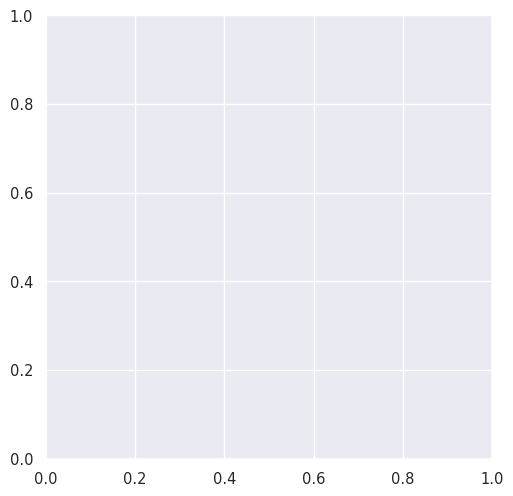

In [ ]:
fig = plt.figure(figsize=(6,6), dpi=96)
ax = plt.gca()

In [ ]:
vx1 = []
vy1 = []

for j in range(0,800) :
  velx = vx[j] + (xA[j] * l[6] )+ (xC[j] * l[10]) + (xS[j] * l[8])
  vx1.append(velx)
  vely = vy[j] + (yA[j])*l[7] + (yC[j])*l[11] + (yS[j])*l[9]
  vy1.append(vely)

In [ ]:
df=pd.DataFrame(vx1)

In [ ]:
df

,0
0,-10.700000
1,-10.700000
2,-9.471511
3,-10.310616
4,-11.520894
...,...
795,-218.500314
796,-220.808109
797,-219.707127
798,-219.918757


In [ ]:
vy1

[-4.33,
 -4.33,
 -4.785180195551185,
 -0.37991809923168773,
 1.587238133092384,
 -0.7111112206087866,
 -0.9004139801848892,
 -0.7381742909210482,
 3.201639376839532,
 -2.824259688636782,
 5.0104217185695,
 7.843736641881145,
 4.386253447709928,
 5.504346054943302,
 10.899273645150716,
 12.214162920306446,
 10.105046959876514,
 15.295675583842472,
 12.700361271859494,
 10.649312164343646,
 12.211671927837797,
 13.154214783276162,
 11.63543434261777,
 18.378156234877302,
 18.85701580672886,
 16.678422531490767,
 21.03991730131496,
 24.75776659345128,
 21.854423947747144,
 21.941358303382266,
 20.749383684000435,
 25.379629636378592,
 22.2547781235717,
 21.061200234653658,
 25.98819525996092,
 22.218193556740427,
 23.08919635045167,
 24.67084522248913,
 23.8800207864704,
 23.8800207864704,
 30.92142149589233,
 27.400721141181364,
 27.400721141181364,
 26.95663306786961,
 27.178677104525487,
 26.43711876974047,
 26.807897937132978,
 26.492773186366776,
 26.16014150500245,
 25.2366179194968

In [ ]:
df=pd.DataFrame(vy1)
df

,0
0,-4.330000
1,-4.330000
2,-4.785180
3,-0.379918
4,1.587238
...,...
795,365.495943
796,362.054765
797,370.014083
798,371.031831


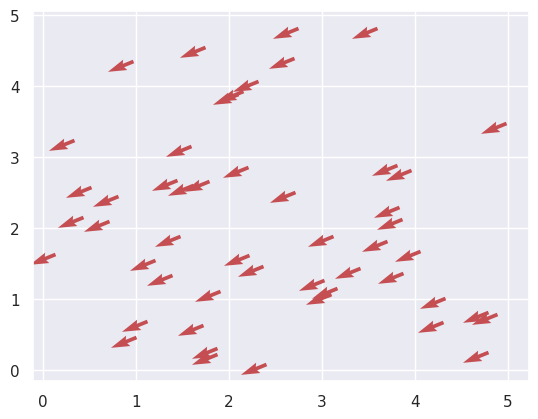

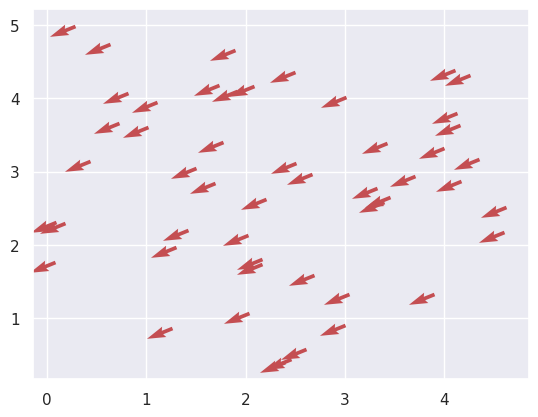

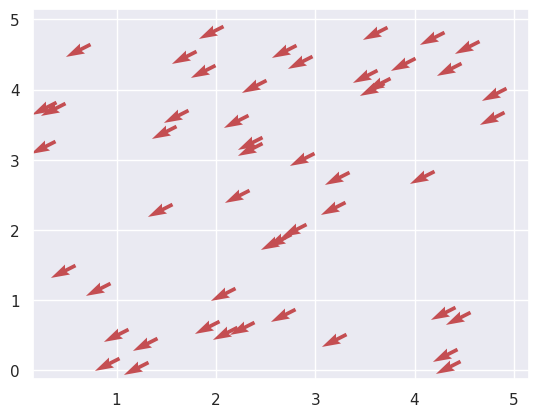

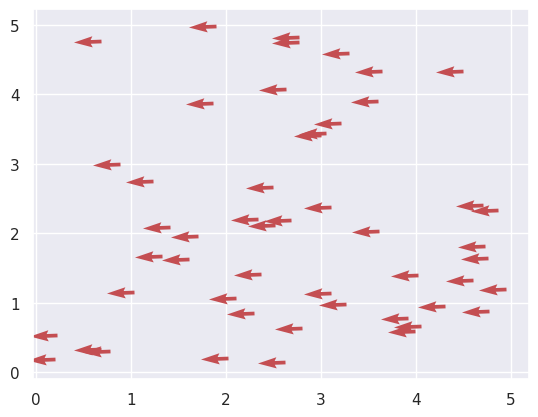

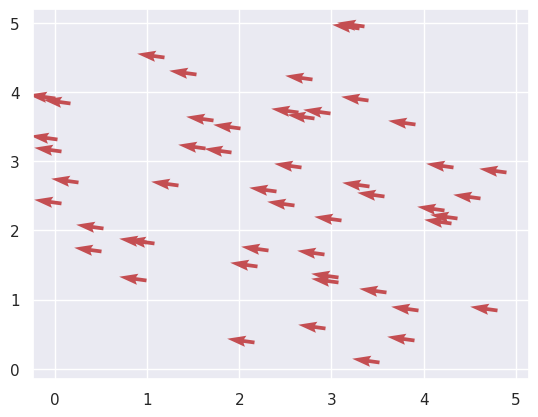

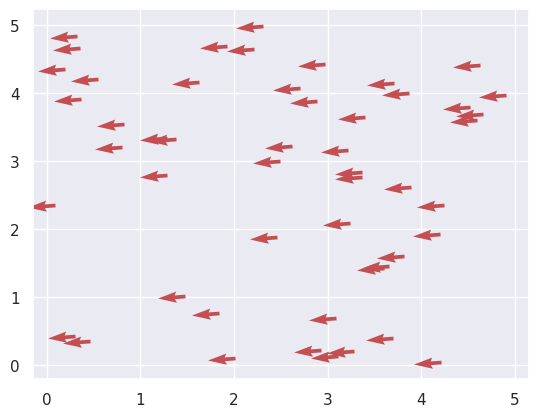

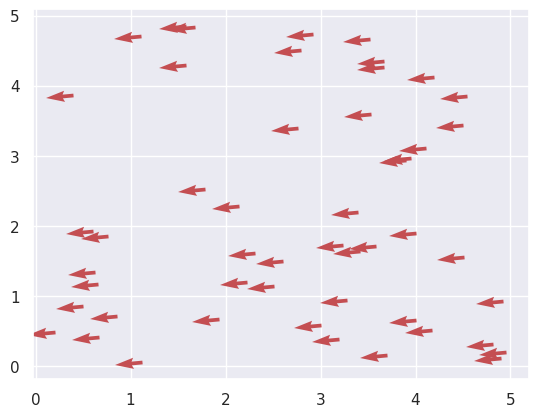

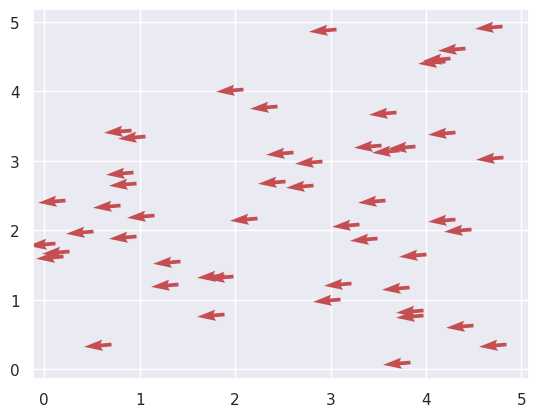

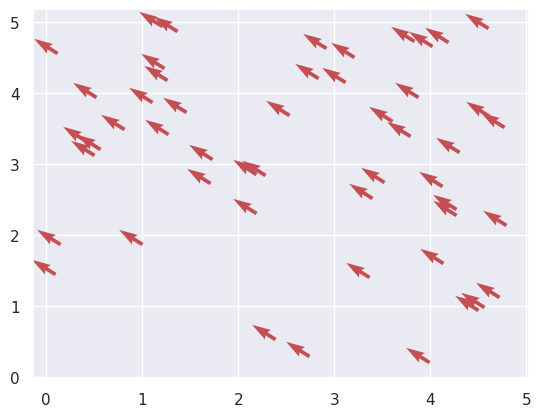

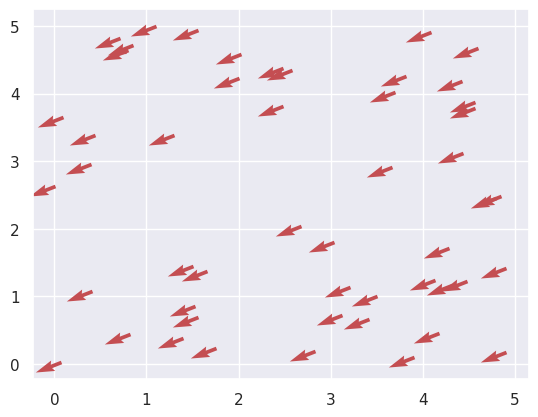

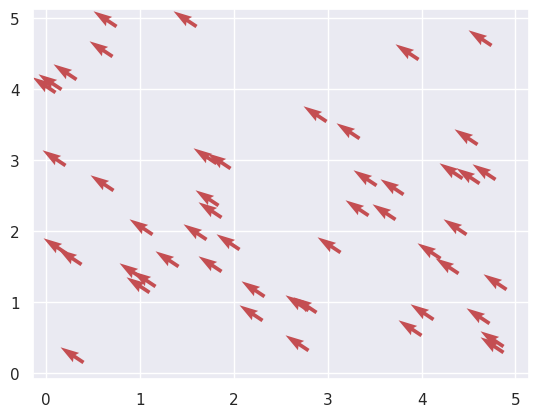

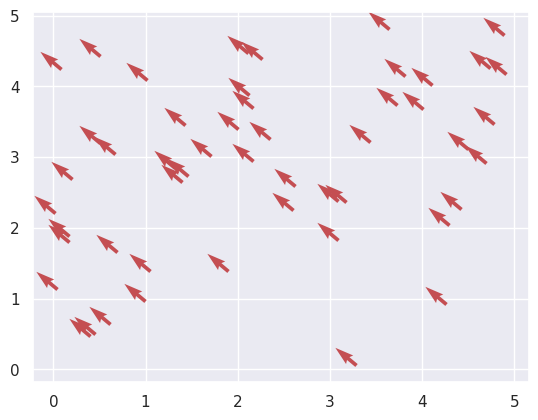

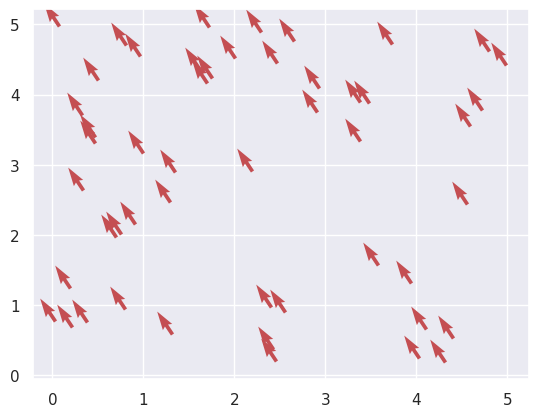

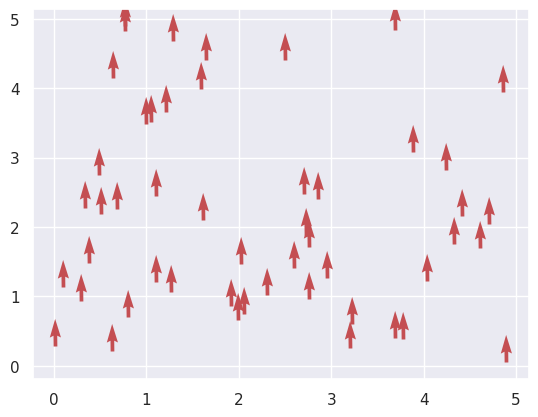

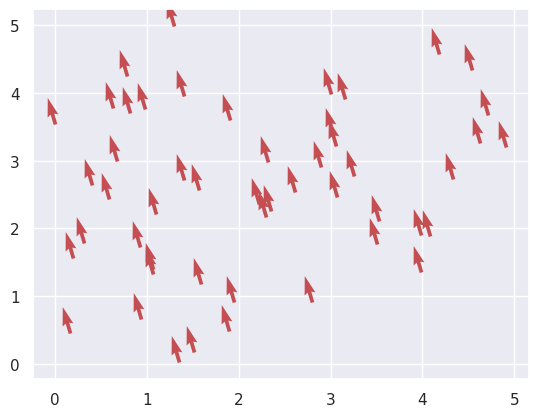

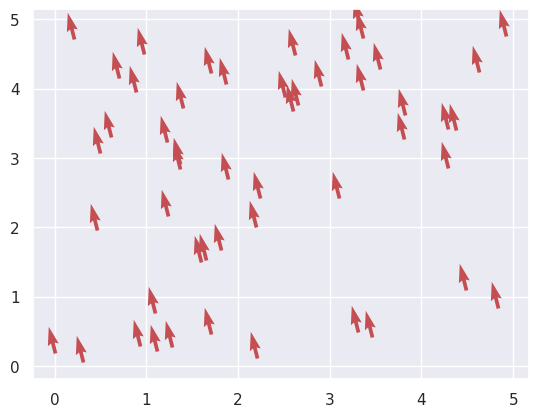

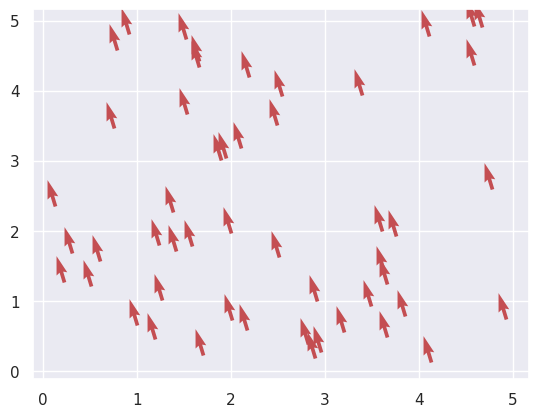

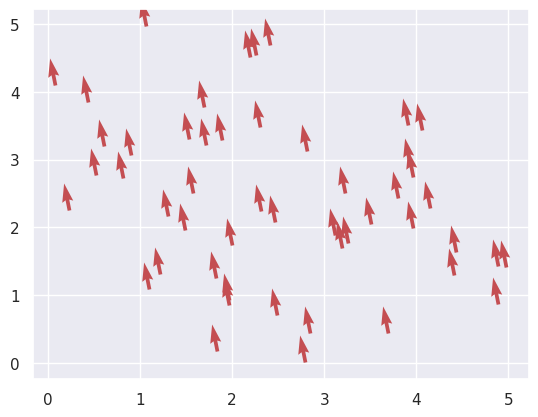

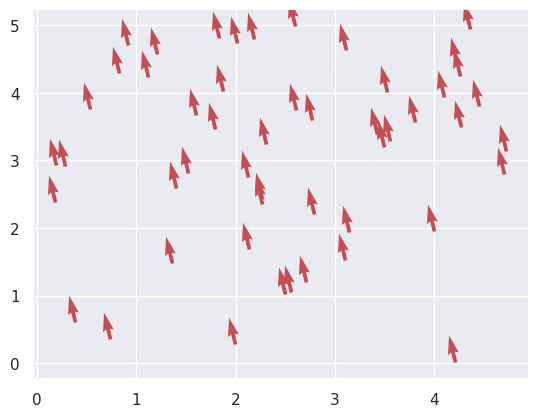

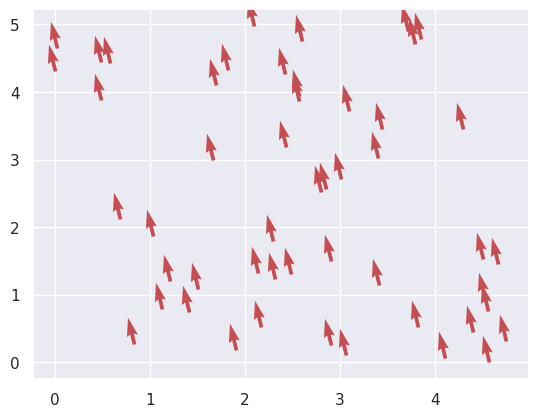

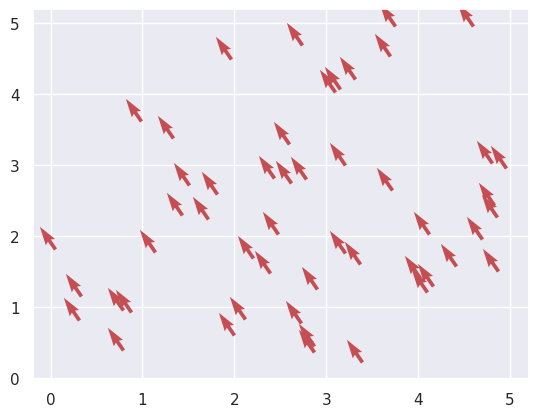

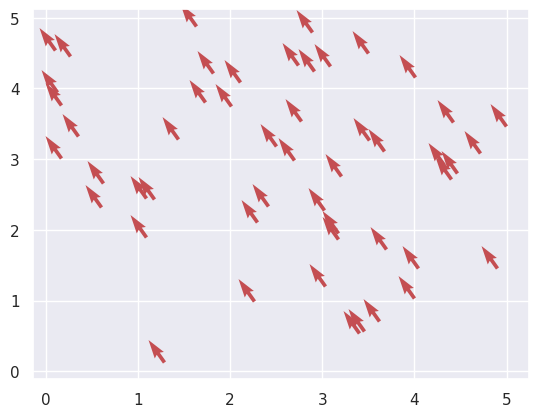

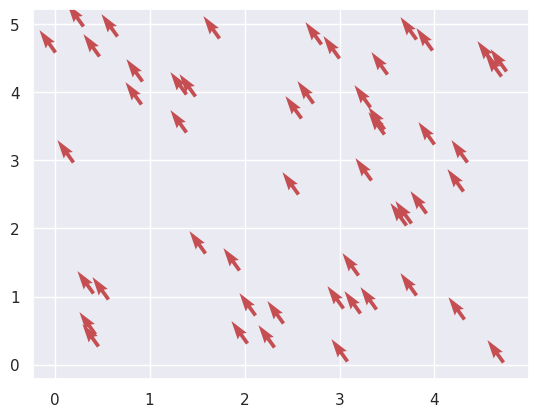

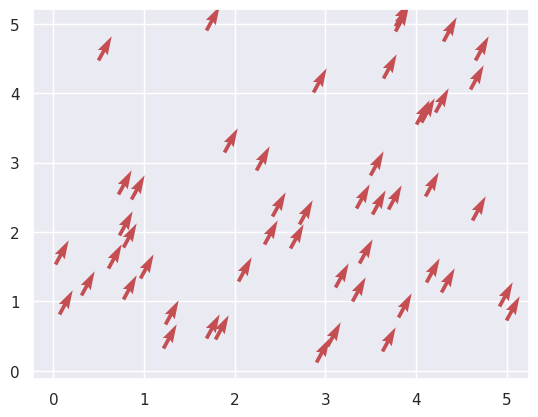

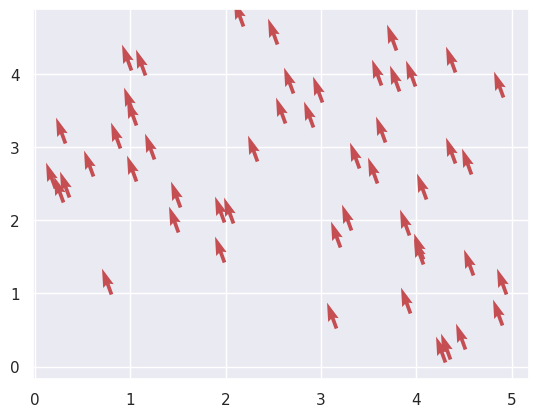

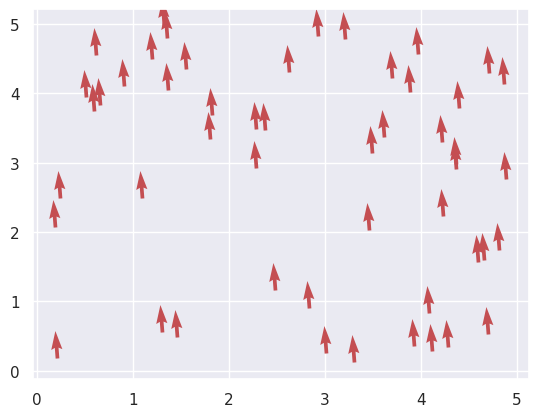

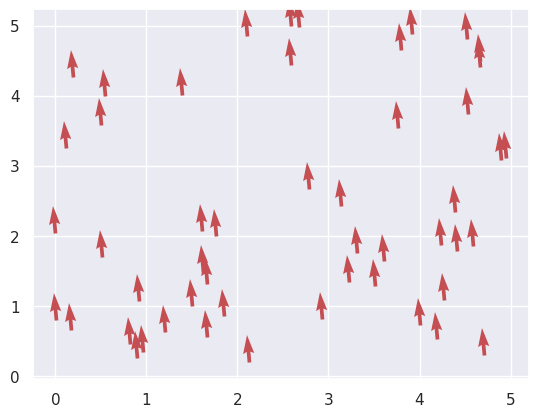

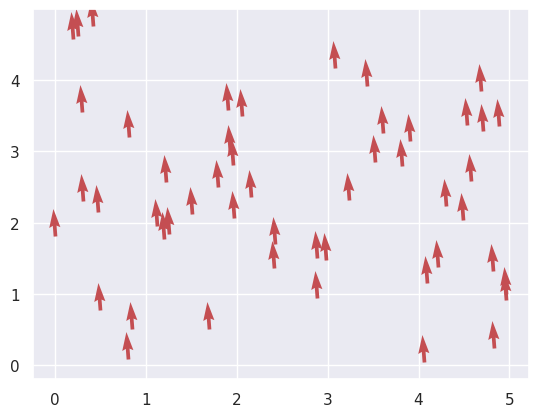

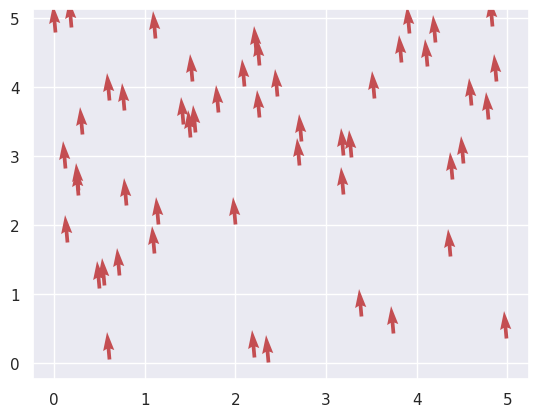

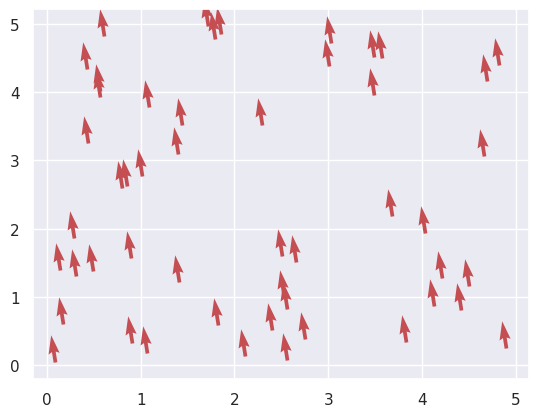

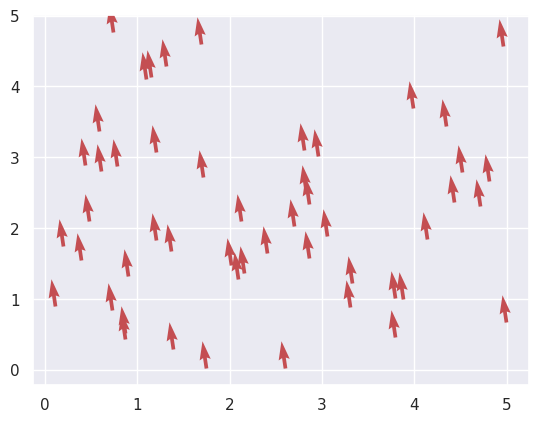

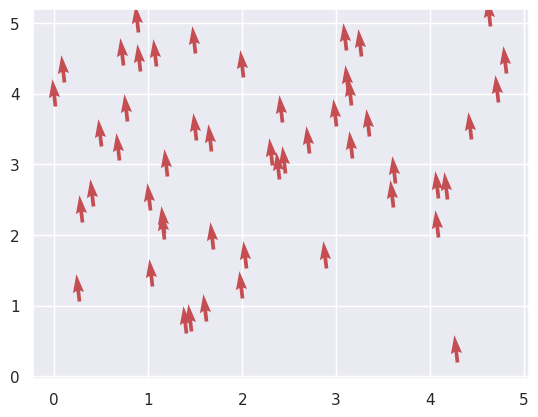

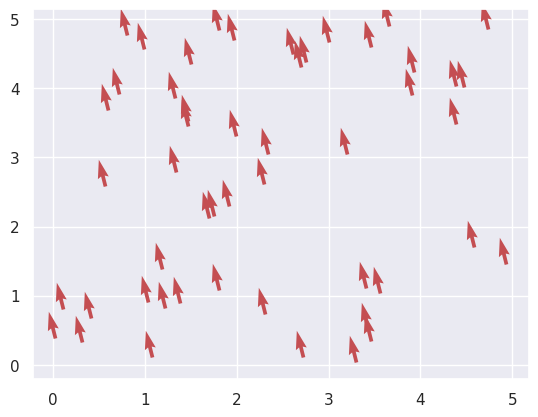

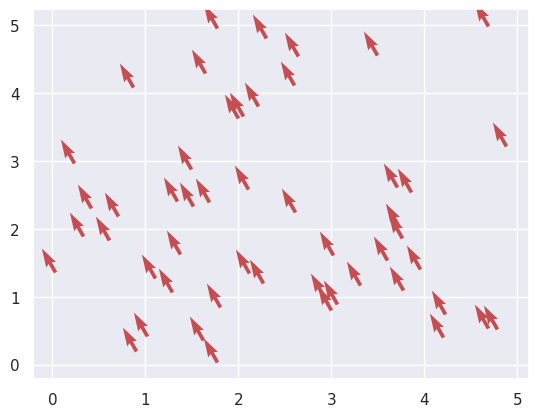

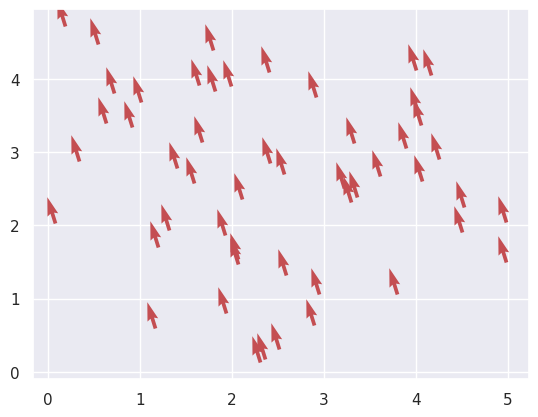

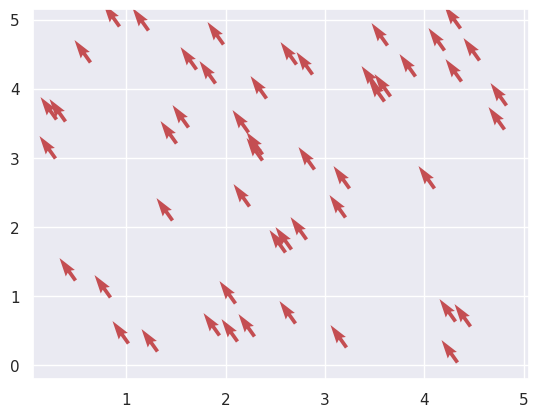

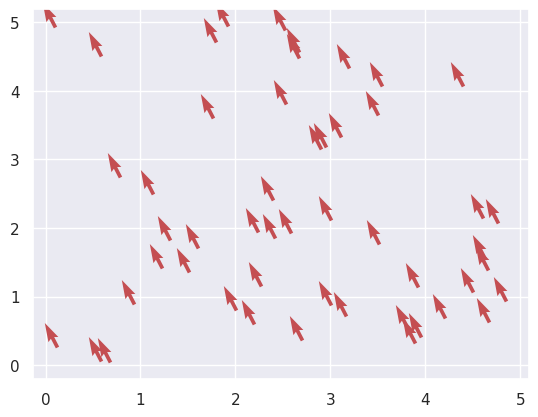

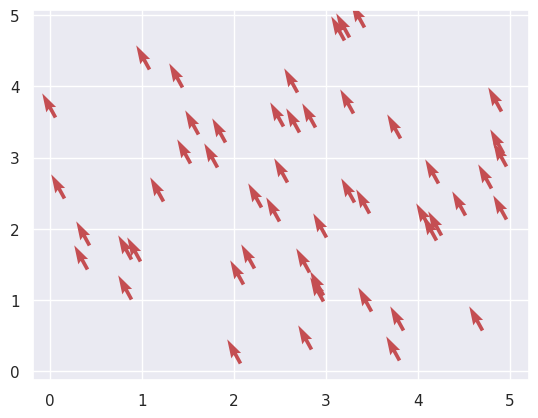

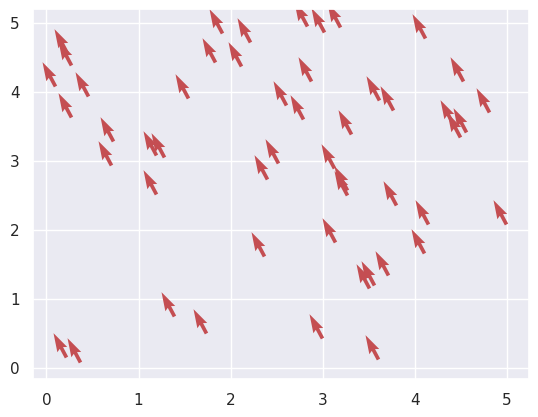

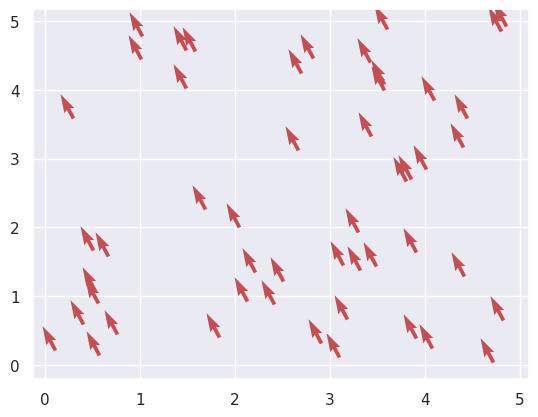

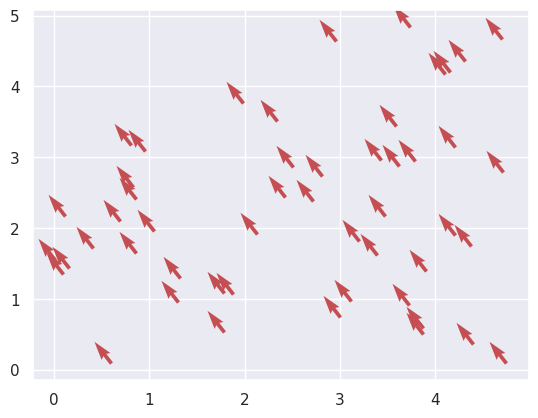

In [ ]:
q = np.random.rand(N,1)*L
k = np.random.rand(N,1)*L

for i in range(0,50):
	# move
  Q = []
  K = []
  for j in range(N) :
    q += vx1[j]*dt
    Q.append(q)
    k += vy1[j]*dt
    K.append(k)
    q = q % L
    k = k % L

	# apply periodic BCs

  if plotRealTime or (i==50-1) :
    plt.cla()
    plt.quiver(q,k,vx1[i],vy1[i],color='r')
    ax.set(xlim=(0,L), ylim=(0,L))
    ax.set_aspect('equal')
    plt.pause(0.001)
